In [7]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Ruta a la carpeta con resultados
results_dir = "results_docker_vsc"

# Cargar todos los archivos JSON de resultados
data = {}
for filename in os.listdir(results_dir):
    if filename.endswith(".json"):
        with open(os.path.join(results_dir, filename)) as f:
            data[filename] = json.load(f)

# Mostrar los archivos cargados
print(f"Archivos cargados: {list(data.keys())}")


Archivos cargados: ['results_docker_20250524_122902.json', 'results_docker_20250524_122956.json', 'results_docker_20250524_123048.json', 'results_docker_20250524_123140.json', 'results_docker_20250524_123233.json', 'results_docker_20250524_123324.json', 'results_docker_20250524_123416.json', 'results_docker_20250524_123507.json', 'results_docker_20250524_123559.json', 'results_docker_20250524_123650.json', 'results_docker_20250524_123743.json', 'results_docker_20250524_123839.json', 'results_docker_20250524_123931.json', 'results_docker_20250524_124023.json', 'results_docker_20250524_124114.json', 'results_docker_20250524_124207.json', 'results_docker_20250524_124259.json', 'results_docker_20250524_124351.json', 'results_docker_20250524_124442.json', 'results_docker_20250524_124533.json']


In [8]:
# Convertir los resultados a un DataFrame
rows = []
for file, tests in data.items():
    source = "docker" if "docker" in file.lower() else "vm"
    for test_name, result in tests.items():
        if "error" not in result:
            rows.append({
                "source": source,
                "file": file,
                "test": test_name,
                "cpu": result["cpu"],
                "memory": result["memory"],
                "time": result["time"]
            })

df = pd.DataFrame(rows)
df.head()


,source,file,test,cpu,memory,time
0,docker,results_docker_20250524_122902.json,idle,0.020000,0.000000,4.999066
1,docker,results_docker_20250524_122902.json,cpu_stress,9.418182,1.988281,5.106588
2,docker,results_docker_20250524_122902.json,cpu_multi,90.827273,80.195312,5.058727
3,docker,results_docker_20250524_122902.json,memory_stress,9.754545,903.203125,5.040094
4,docker,results_docker_20250524_122902.json,memory_large,0.150000,0.000000,4.000694


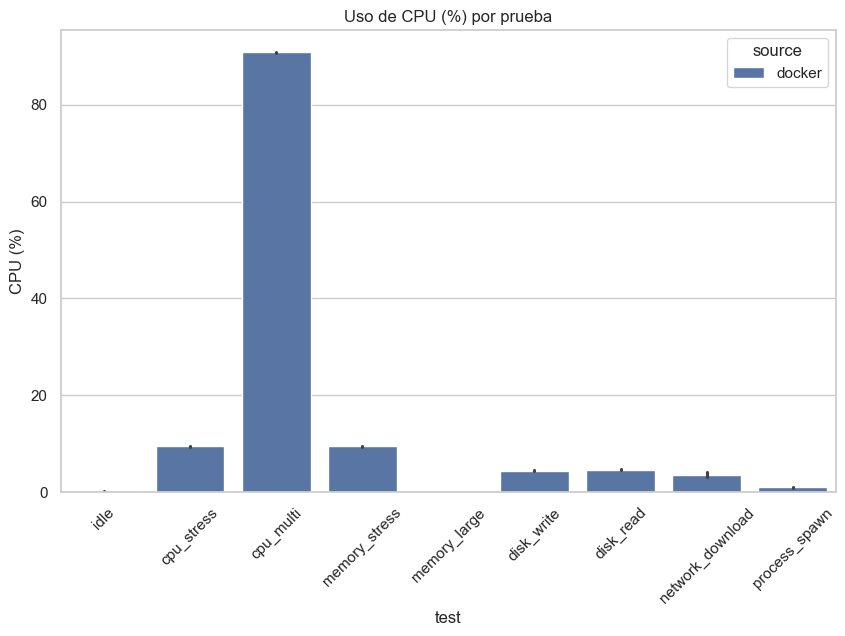

In [9]:
plt.figure()
sns.barplot(data=df, x="test", y="cpu", hue="source")
plt.title("Uso de CPU (%) por prueba")
plt.xticks(rotation=45)
plt.ylabel("CPU (%)")
plt.show()


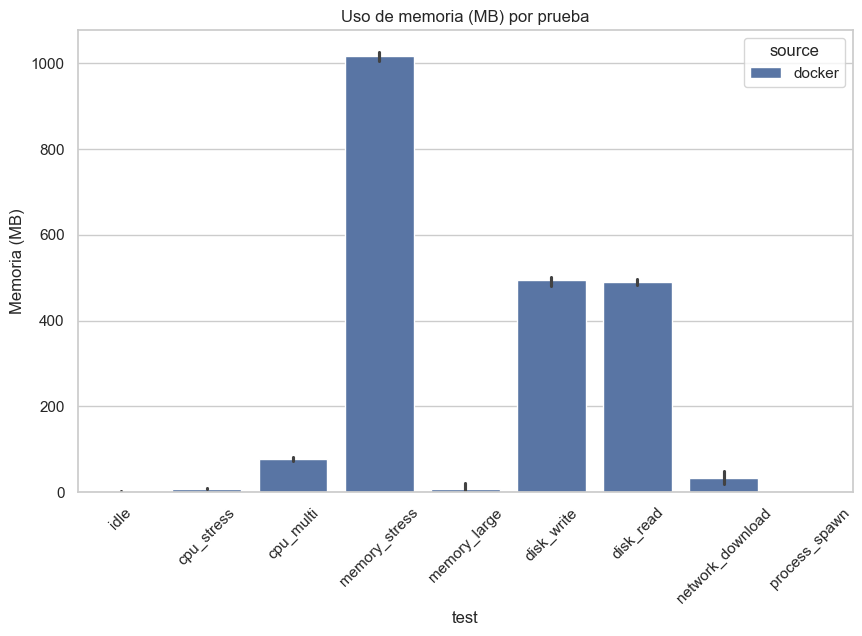

In [10]:
plt.figure()
sns.barplot(data=df, x="test", y="memory", hue="source")
plt.title("Uso de memoria (MB) por prueba")
plt.xticks(rotation=45)
plt.ylabel("Memoria (MB)")
plt.show()


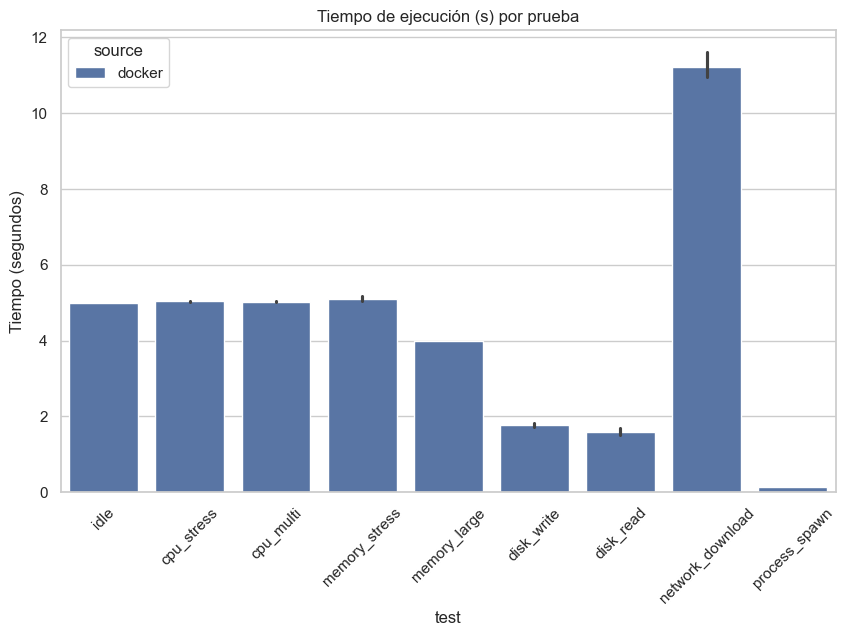

In [11]:
plt.figure()
sns.barplot(data=df, x="test", y="time", hue="source")
plt.title("Tiempo de ejecución (s) por prueba")
plt.xticks(rotation=45)
plt.ylabel("Tiempo (segundos)")
plt.show()


In [12]:
summary = df.groupby(["source", "test"]).agg(
    cpu_mean=("cpu", "mean"),
    cpu_std=("cpu", "std"),
    memory_mean=("memory", "mean"),
    memory_std=("memory", "std"),
    time_mean=("time", "mean"),
    time_std=("time", "std")
).reset_index()

summary


,source,test,cpu_mean,cpu_std,memory_mean,memory_std,time_mean,time_std
0,docker,cpu_multi,90.827727,0.087470,78.437305,14.204773,5.028268,0.029921
1,docker,cpu_stress,9.453636,0.246152,8.336719,2.895705,5.035862,0.018412
2,docker,disk_read,4.671667,0.374355,490.470508,16.547555,1.600682,0.223929
3,docker,disk_write,4.457000,0.219181,494.065039,28.706231,1.767798,0.110681
4,docker,idle,0.095500,0.104149,1.443750,0.873914,4.999828,0.000634
5,docker,memory_large,0.159375,0.030585,7.335352,28.414453,4.000284,0.000472
6,docker,memory_stress,9.499356,0.258392,1017.361523,27.844505,5.107404,0.150104
7,docker,network_download,3.580985,1.332479,32.477539,37.347705,11.226949,0.779429
8,docker,process_spawn,0.990000,0.271254,0.000000,0.000000,0.131686,0.007791
